# Logistic regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
import statsmodels.api as sm

In [68]:
df_d=pd.read_excel('data/Default.xlsx')

In [69]:
df_d.drop(columns='Unnamed: 0', inplace=True)
df_d.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### 1. Visual Exploration

**Visualize Relationships of Categorical and Quantitative Value by Boxplots**

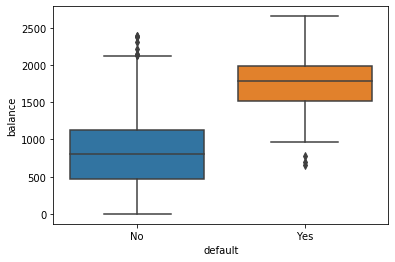

In [11]:
# Balance for Categories: Default/No Default
sns.boxplot(x='default', y='balance', data=df_d)

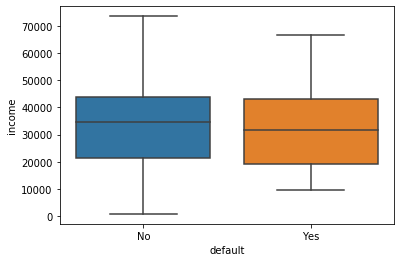

In [12]:
# Income for Categories: Default/No Default
sns.boxplot(x='default', y='income', data=df_d)

**Relationships of two categorical variables**

In [34]:
pd.crosstab(df_d['student'], df_d['default'], margins=True, normalize=True)

default,No,Yes,All
student,,,
No,0.6850,0.0206,0.7056
Yes,0.2817,0.0127,0.2944
All,0.9667,0.0333,1.0000


**Effect of Income and Balance on Default**

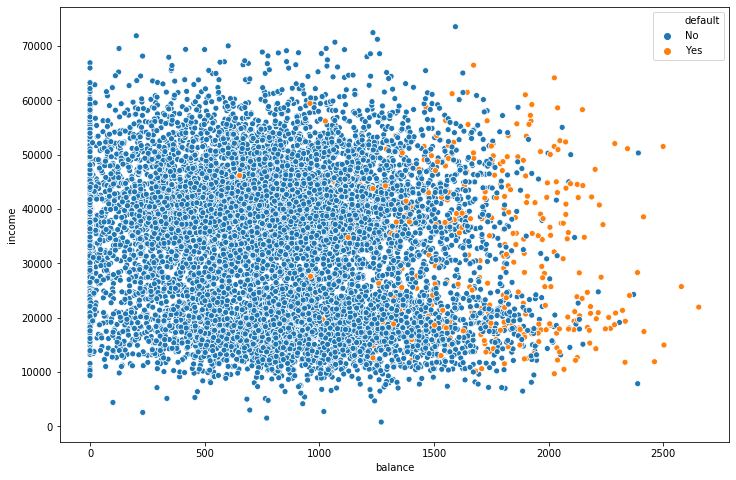

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='balance', y='income', hue='default', data=df_d)

### 2. Simple Logistic Regression

Predictor: Balance, Response: Default

In [70]:
# Encode Default and Student Variables
df_d['default'].replace({'Yes': 1, 'No':0}, inplace=True)
df_d['student'].replace({'Yes': 1, 'No':0}, inplace=True)
df_d.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [72]:
# With statsmodels
log1=sm.Logit.from_formula('default ~ balance', df_d).fit()
log1.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.4534
Time:                        15:20:48   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [76]:
# Predict Values with statsmodels
log1.predict({'balance': 1000})

0    0.005752
dtype: float64

In [77]:
log1.predict({'balance': 2000})

0    0.585769
dtype: float64

In [81]:
# Fit with sklearn
log2=sk_lm.LogisticRegression().fit(df_d[['balance']], df_d['default'])
(log2.intercept_, log2.coef_)

(array([-10.65132824]), array([[0.00549892]]))

Predictor: Student, Response: Default

In [93]:
log1_s=sm.Logit.from_formula('default ~ student', df_d).fit()
log1_s.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                0.004097
Time:                        15:42:09   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.115      3.520      0.000       0.179       0.630
==============================================================================
"""

**In simple regression factor "student" predicts higher default probability (coef > 0). Not so in multiple logit (see below)**

### 3. Multiple Logistic Regression

In [94]:
log_mult=sm.Logit.from_formula('default ~ balance + income + student', df_d).fit()
log_mult.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.4619
Time:                        15:44:22   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Now factor "student" predicts lower probability of default. The reason for this apparent paradox is that factor "student" is correlated with "balance"** -> **Confounding Factors**